# Performance benchmarks for LIF layers in Rockpool
This notebook runs and collects results for all benchmarks provided in `rockpool.utilities.benchmarks`.

In [17]:
import rockpool
import os
import datetime

print(f'Benchmarks run on rockpool version {rockpool.__version__}, on date {datetime.datetime.today()}.')
print(f'System descriptor: {os.uname()}')

Benchmarks run on rockpool version 2.4.dev, on date 2022-11-10 18:36:51.917099.
System descriptor: posix.uname_result(sysname='Darwin', nodename='Entangled.net', release='21.6.0', version='Darwin Kernel Version 21.6.0: Mon Aug 22 20:17:10 PDT 2022; root:xnu-8020.140.49~2/RELEASE_X86_64', machine='x86_64')


Attempting to run benchmark LIFJax, no JIT...


100%|██████████| 10/10 [02:00<00:00, 12.08s/it]


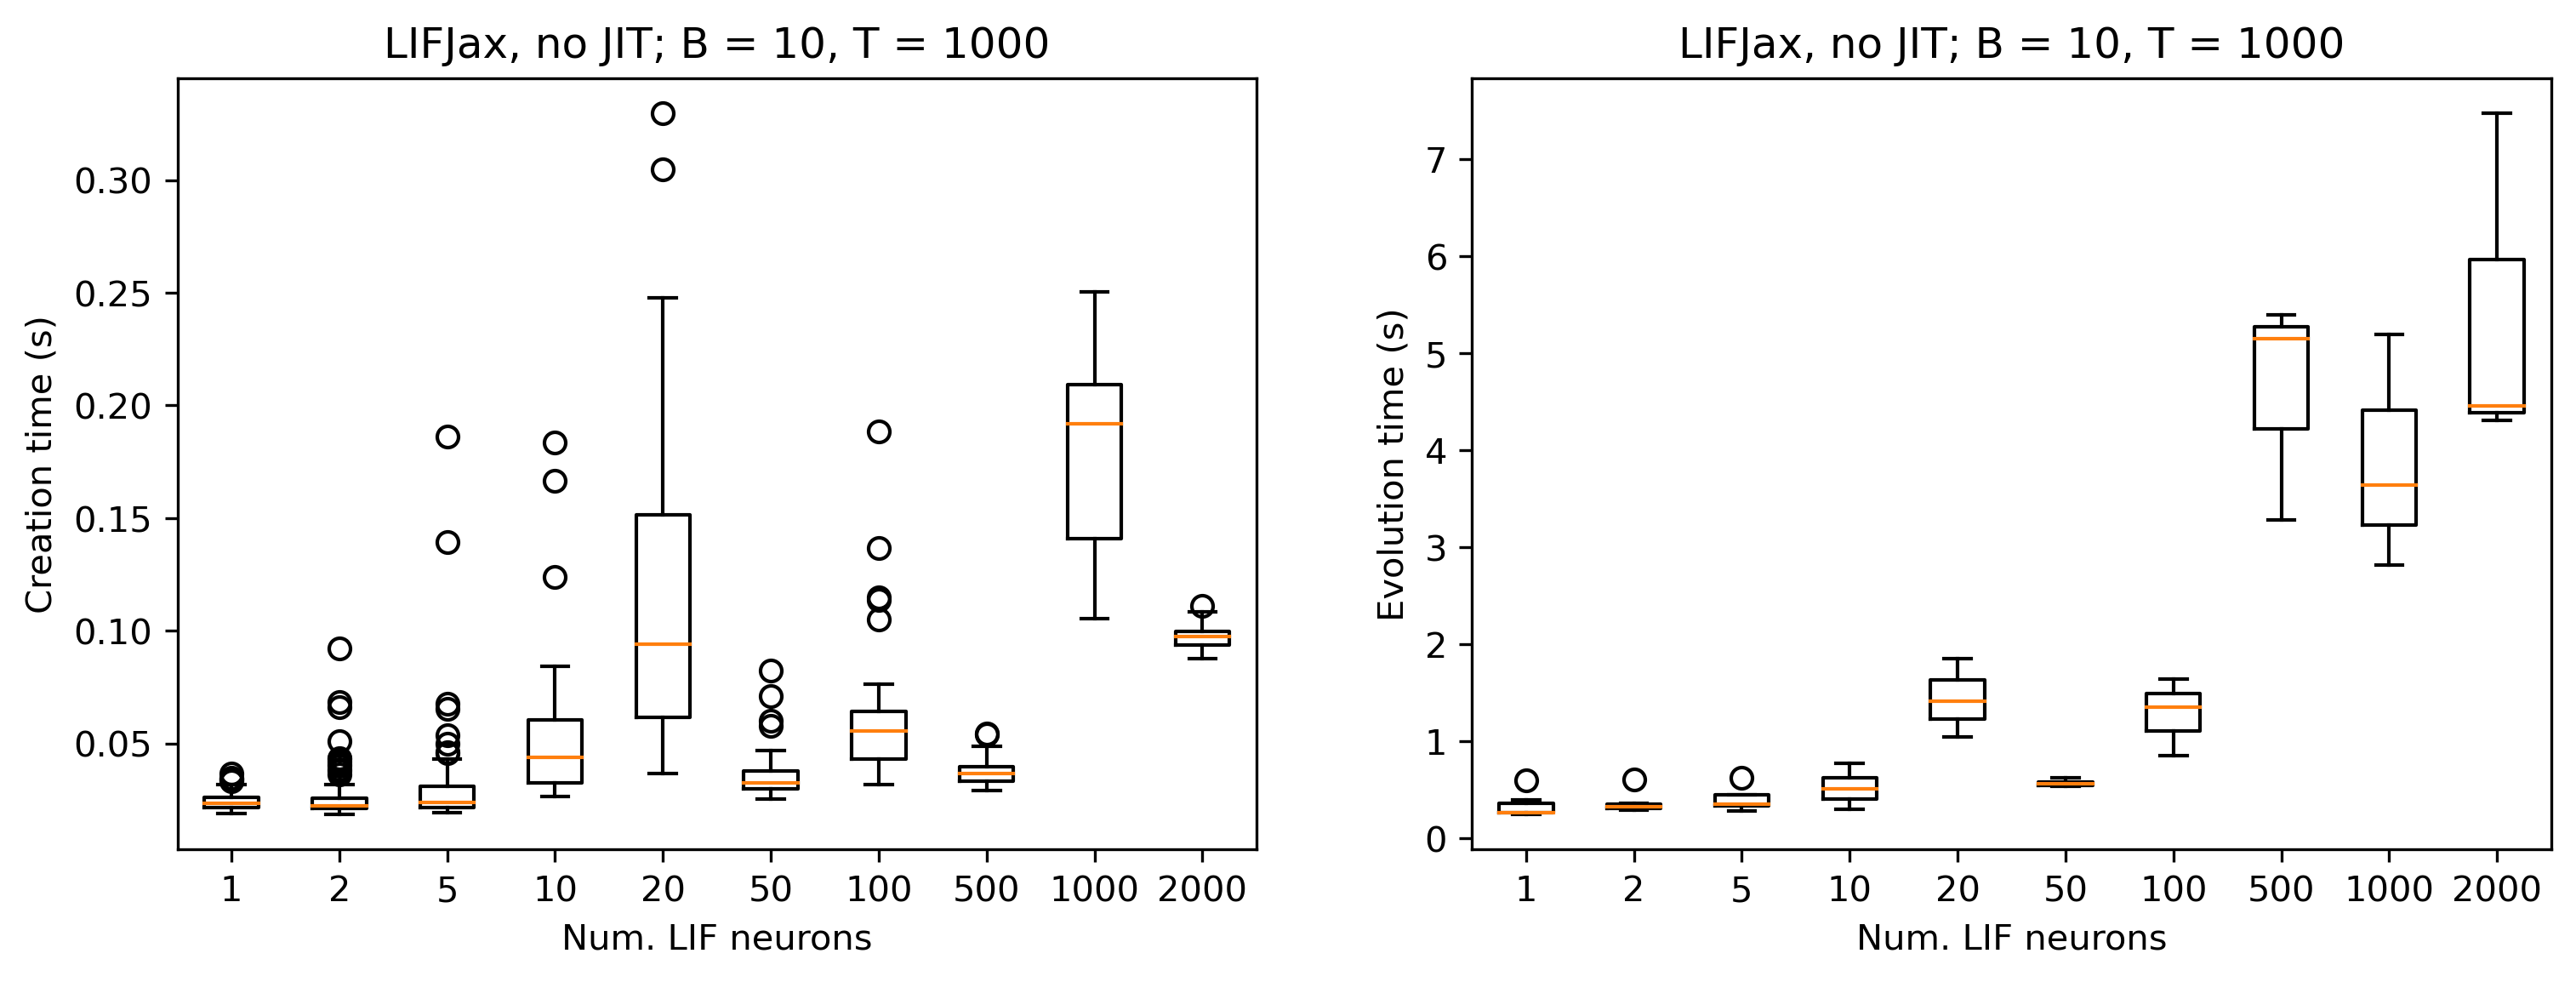

In [5]:
from rockpool.utilities.benchmarking import benchmark_neurons, plot_benchmark_results, all_lif_benchmarks
import warnings
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (12, 4)

for benchmark in all_lif_benchmarks:
    try:
        p_fn, c_fn, e_fn, bench_name = benchmark()
        print(f'Attempting to run benchmark {bench_name}...')

        results = benchmark_neurons(p_fn, c_fn, e_fn, bench_name)
        _, axes = plt.subplots(1, 2)
        plot_benchmark_results(*results, axes)

    except Exception as e:
        warnings.warn(f'Benchmark {bench_name} failed with error {str(e)}.')